# K-means

El algoritmo trabaja iterativamente para asignar a cada “punto” (las filas del conjunto de entrada forman una coordenada) uno de los “K” grupos basado en sus características. Son agrupados en base a la similitud de sus features (las columnas). 

Resultados de ejecutar el algoritmo:

+ Los “centroids” de cada grupo que serán unas “coordenadas” de cada uno de los K conjuntos que se utilizarán para poder etiquetar nuevas muestras.

+ Etiquetas para el conjunto de datos de entrenamiento. Cada etiqueta perteneciente a uno de los K grupos formados.

Los grupos se van definiendo de manera “orgánica”, es decir, que se va ajustando su posición en cada iteración del proceso, hasta que converge el algoritmo. Una vez encontrados los centroids se deben analizar para ver cuáles son sus características únicas, frente a la de los otros grupos. Estos grupos son las etiquetas que genera el algoritmo.

## Dónde usar K-means

El algoritmo de Clustering K-means es uno de los más usados para encontrar grupos ocultos, o sospechados en teoría sobre un conjunto de datos no etiquetado. Esto puede servir para confirmar -o desterrar- alguna teoría que se tenga asumida de los datos. 

También puede ayudar a descubrir relaciones asombrosas entre conjuntos de datos, que de manera manual, no se hubieran reconocido. Una vez que el algoritmo ha ejecutado y obtenido las etiquetas, será fácil clasificar nuevos valores o muestras entre los grupos obtenidos.

### Algunos usos:

+ Segmentación por comportamiento: relacionar el carrito de compras de un usuario, sus tiempos de acción e información del perfil.
+ Categorización de productos: agrupar productos por actividad en sus ventas
+ Detectar anomalías o actividades sospechosas: según el comportamiento en una web reconocer un troll -o un bot- de un usuario normal

## Características de las entradas

Las “features” o características que se utilicen como entradas para aplicar el algoritmo k-means deberán ser de valores numéricos, continuos en lo posible. En caso de valores categóricos se puede intentar pasarlo a valor numérico, pero no es recomendable pues no hay una “distancia real”. 

Es recomendable que los valores utilizados estén **normalizados**, manteniendo una misma escala. En algunos casos también funcionan mejor datos porcentuales en vez de absolutos. 

No conviene utilizar features que estén correlacionados o que sean escalares de otros.

## Funcionamiento de K-means

El algoritmo utiliza una proceso iterativo en el que se van ajustando los grupos para producir el resultado final. Para ejecutar el algoritmo se debe pasar como entrada el conjunto de datos y un valor de K. 

El conjunto de datos serán las características o features para cada punto. Las posiciones iniciales de los K centroides serán asignadas de manera aleatoria de cualquier punto del conjunto de datos de entrada. Luego se itera en dos pasos:

### PASO 1- Asignación de datos

Cada “fila” del conjunto de datos se asigna al centroide más cercano basado en la distancia cuadrada Euclideana. Se utiliza la siguiente fórmula (donde dist() es la distancia Euclideana standard):

argmin $dist(c_{i},x)^{2}$ con $c_{i} \in C$

### PASO 2 - Actualización de centroide

Los centroides de cada grupo son recalculados. Esto se hace tomando una media de todos los puntos asignados en el paso anterior.

$c_{i} = \frac{1}{|S_{i}|}\sum_{x_i \in S_i} x_{i}$

El algoritmo itera entre estos pasos hasta cumplir uno de los criterios de detención:

+ Si no hay cambios en los puntos asignados a los grupos,
+ Si la suma de las distancias se minimiza,
+ Se alcanza un número máximo de iteraciones.

## Aplicación de K-Means

Usando dataset de desempeño de estudiantes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [2]:
data_frame = pd.read_csv("3.4.2 dataset_StudentsPerformance.csv")
data_frame.head()

,user,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,female,group B,bachelor's degree,standard,none,72,72,74
1,2,female,group C,some college,standard,completed,69,90,88
2,3,female,group B,master's degree,standard,none,90,95,93
3,4,male,group A,associate's degree,free/reduced,none,47,57,44
4,5,male,group C,some college,standard,none,76,78,75


## Análisis exploratorio

In [3]:
data_frame.shape

(1000, 9)

In [4]:
data_frame.dtypes

user                            int64
gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [6]:
# Vemos cuantos estudiantes hay de cada categoria (nivel de eduación de los padres)
data_frame.groupby('parental level of education').size()

parental level of education
associate's degree    222
bachelor's degree     118
high school           196
master's degree        59
some college          226
some high school      179
dtype: int64

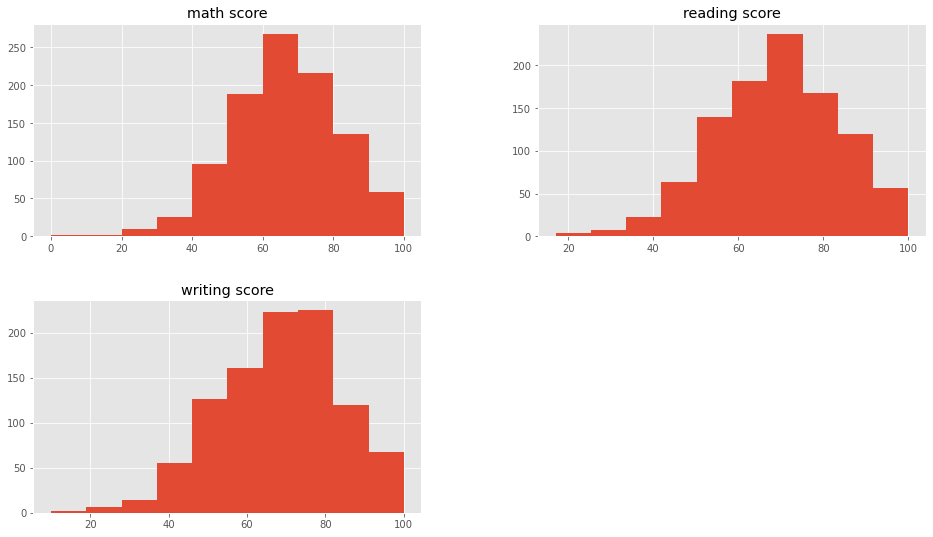

In [7]:
data_frame.drop(['parental level of education','user'],1).hist()
plt.show()

## Tratamiento de variable categórica

En este caso se usa el enfoque de **etiqueta codificada**.

En este enfoque se asigna a cada valor de la lista un número entero diferente.

In [8]:
# Pasamos de variable categórica el nivel de educación de los padres
total = data_frame['parental level of education'].unique().size
d_categoria = dict(zip(data_frame['parental level of education'].unique(), range(1,total+1)))

data_frame['categoria'] = data_frame['parental level of education'].map(d_categoria)
data_frame.head()

,user,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,categoria
0,1,female,group B,bachelor's degree,standard,none,72,72,74,1
1,2,female,group C,some college,standard,completed,69,90,88,2
2,3,female,group B,master's degree,standard,none,90,95,93,3
3,4,male,group A,associate's degree,free/reduced,none,47,57,44,4
4,5,male,group C,some college,standard,none,76,78,75,2


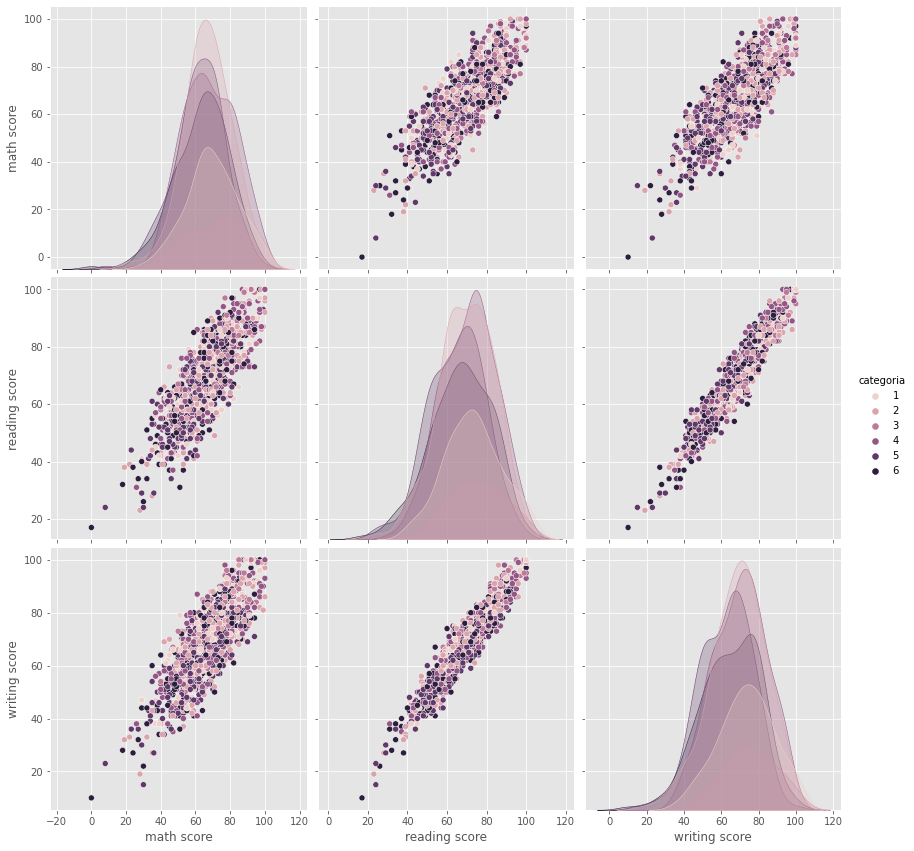

In [9]:
sb.pairplot(data_frame.dropna(), hue='categoria',height=4,vars=["math score","reading score","writing score"],kind='scatter')

En este caso seleccionamos 3 dimensiones: los puntajes en la prueba de matemáticas, de lectura y de escritura y se cruzan para ver si entregan alguna pista de su agrupación y la relación con sus categorías.

## Preparación de datos

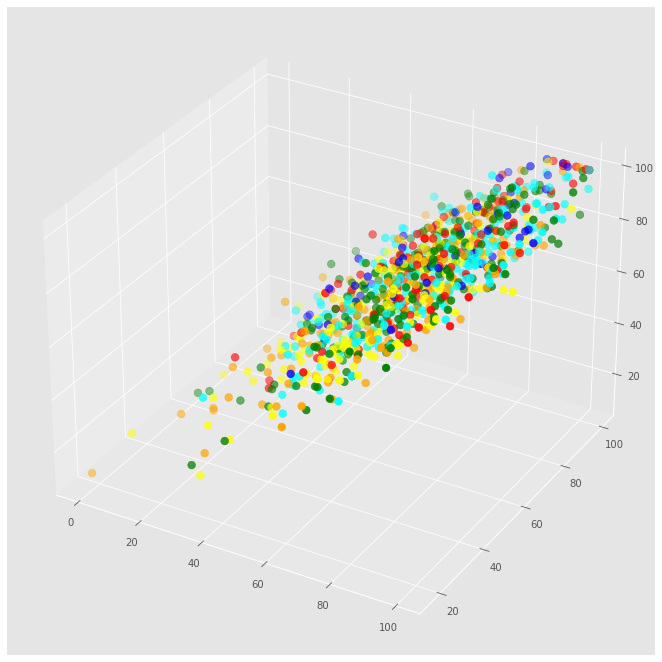

In [10]:
X = np.array(data_frame[["math score","reading score","writing score"]])
y = np.array(data_frame['categoria'])
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
# NOTA: asignamos la posición cero del array repetida pues las categorias comienzan en id 1. 
asignar=[]
for row in y:
    asignar.append(colores[row])

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
plt.show()

## Aplicación del algoritmo

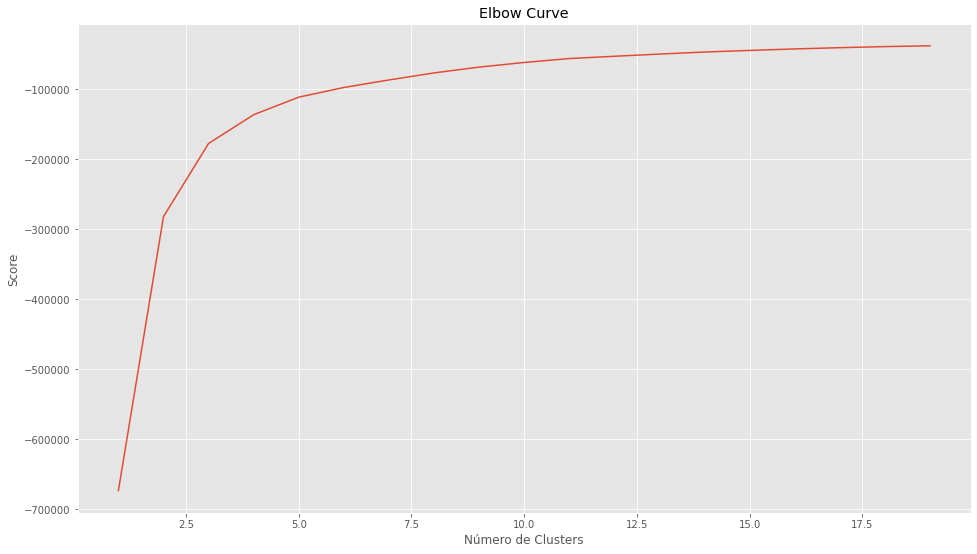

In [11]:
from sklearn.cluster import KMeans
num_clusters = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in num_clusters]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(num_clusters,score)
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

El gráfico anterior representa la curva de Elbow. Se trata de una heurística para determinar el número de conglomerados en un conjunto de datos.

Se observa que la curva es bastante “suave”. Se va a considerar a 5 como un buen número para K.

## Ejecución del algoritmo

Se ejecuta el algoritmo para 5 clusters y se obtienen las etiquetas y los centroids.

In [12]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[63.67595819 66.61324042 66.02090592]
 [86.05454545 89.69090909 89.16363636]
 [52.66972477 54.7706422  52.81192661]
 [36.23728814 39.55932203 37.22033898]
 [73.78228782 77.4095941  76.32841328]]


### Representación gráfica

Gráfica 3D con colores para los grupos y veremos si se diferencian: (las estrellas marcan el centro de cada cluster)

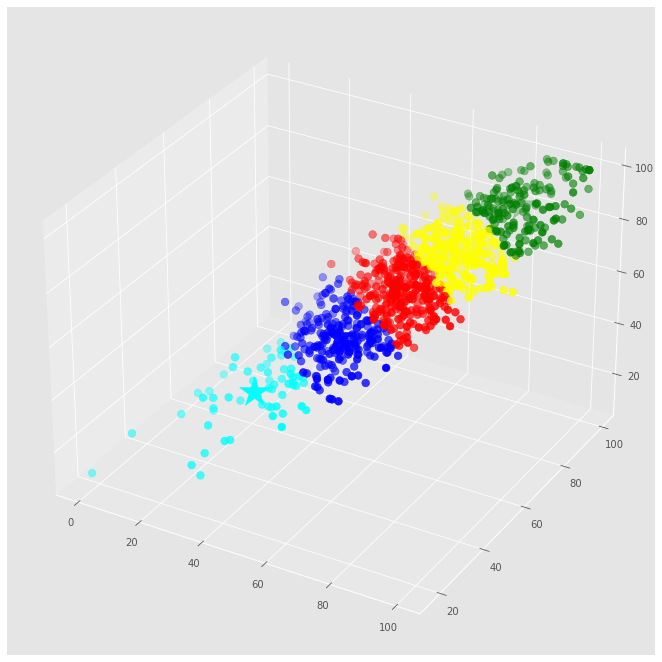

In [13]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
# 5 colores porque k = 5
colores=['red','green','blue','cyan','yellow'] 
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

### Análisis del gráfico

Es posible ver que el Algoritmo de K-Means con K=5 ha agrupado a los 1000 estudiantes por el nivel de educación de sus padres, teniendo en cuenta las 3 dimensiones que se utilizaron: puntaje en las pruebas de matemáticas, lectura y escritura.

### Gráficos de complemento

Se elaboran 3 gráficas en 2 dimensiones con las proyecciones a partir de la gráfica 3D para que ayude a visualizar los grupos y su clasificación:

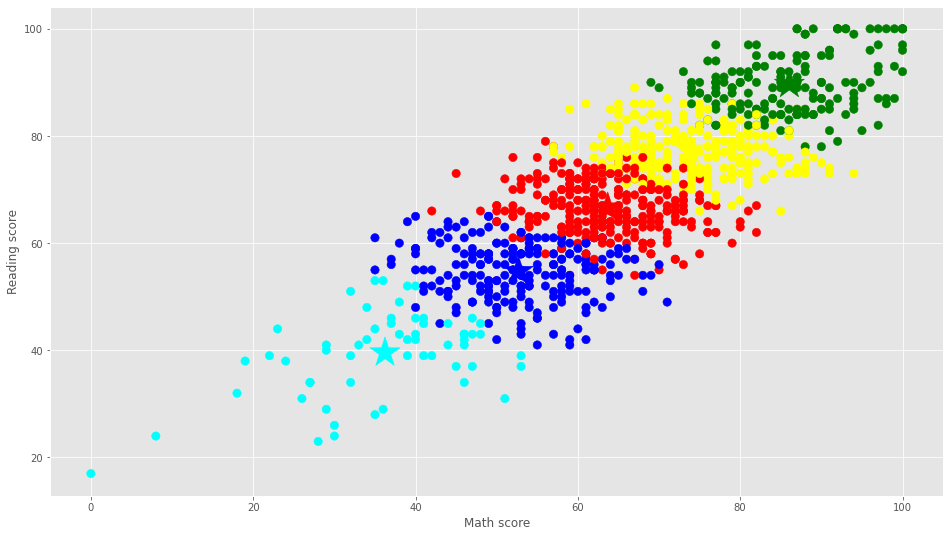

In [14]:
# Getting the values and plotting it
f1 = data_frame['math score'].values
f2 = data_frame['reading score'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.xlabel("Math score")
plt.ylabel("Reading score")
plt.show()

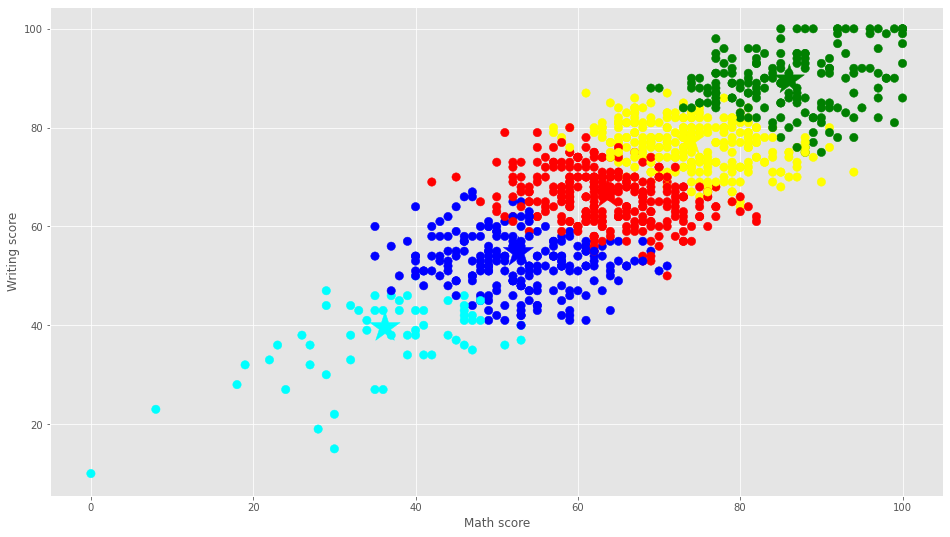

In [15]:
# Getting the values and plotting it
f1 = data_frame['math score'].values
f2 = data_frame['writing score'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.xlabel("Math score")
plt.ylabel("Writing score")
plt.show()

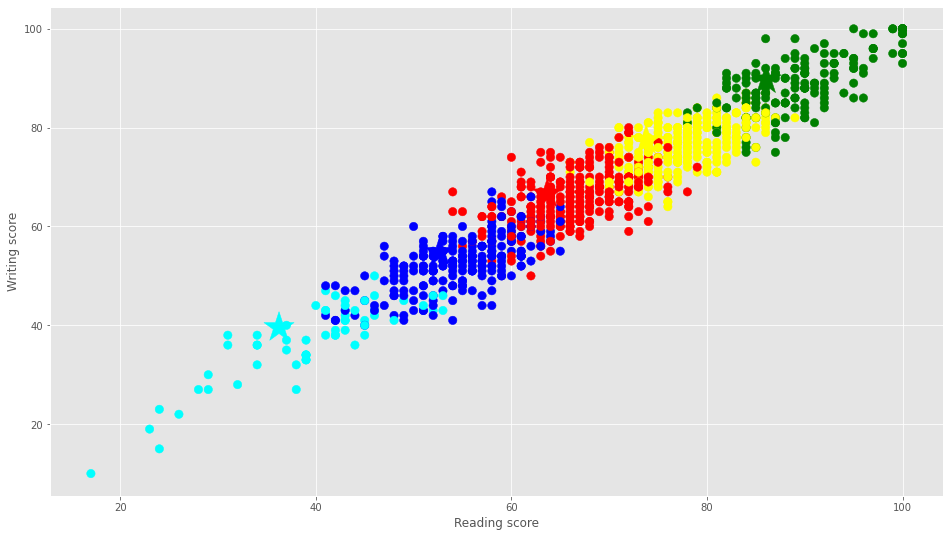

In [16]:
f1 = data_frame['reading score'].values
f2 = data_frame['writing score'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.xlabel("Reading score")
plt.ylabel("Writing score")
plt.show()

## Cantidad de estudiantes por grupo

In [17]:
copy =  pd.DataFrame()
copy['user']=data_frame['user'].values
copy['categoria']=data_frame['categoria'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,287
1,green,165
2,blue,218
3,cyan,59
4,yellow,271


In [18]:
# Se busca el representante del grupo, el usuario cercano a su centroid
from sklearn.metrics import pairwise_distances_argmin_min
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([413, 551, 650, 217, 843])

In [19]:
users=data_frame['user'].values
for row in closest:
    print(data_frame.iloc[row])
    print("*********")

user                                        414
gender                                     male
race/ethnicity                          group B
parental level of education    some high school
lunch                                  standard
test preparation course               completed
math score                                   63
reading score                                67
writing score                                67
categoria                                     6
Name: 413, dtype: object
*********
user                                         552
gender                                      male
race/ethnicity                           group B
parental level of education    bachelor's degree
lunch                               free/reduced
test preparation course                completed
math score                                    87
reading score                                 90
writing score                                 88
categoria                                   

## Clasificación de nuevas muestras

In [20]:
X_new = np.array([[87,90,88]]) # User 552

new_labels = kmeans.predict(X_new)
print(new_labels)

[1]


## Conclusiones

El algoritmo de K-means ayudará a crear clusters cuando se tienen grandes grupos de datos sin etiquetar, cuando se quiera intentar descubrir nuevas relaciones entre features o para probar o declinar hipótesis que se tienen del negocio.

Puede haber casos en los que no existan grupos naturales, o clusters que contengan una verdadera razón de ser. Si bien K-means siempre brindará “k clusters”, quedará a criterio reconocer la utilidad de los mismos o bien revisar las features y descartar las que no sirven o conseguir nuevas. 

Se debe tener en cuenta que en este ejemplo se utilizó como medida de similitud entre features la distancia Euclideana. Sin embargo, se puede utilizar otrasfunciones que podrían arrojar mejores resultados (como Manhattan, Lavenshtein, Mahalanobis, entre otros).